In [2]:
%cd ..

/home/pcallens/room-acoustics-characterization


In [3]:
from utils.mfcc import *
from librosa import display
import matplotlib.pyplot as plt
from scipy.io import wavfile


In [62]:
time.shape

(64000,)

In [64]:
rir.shape

(27701,)

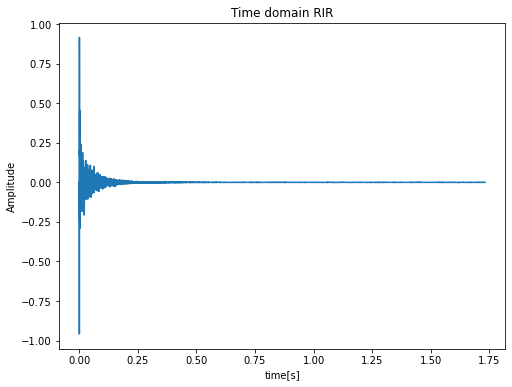

In [71]:
fs, rir = wavfile.read('Home_to_DL_sr16000_c_1_trimmed/LivingRoomHB_RIR.wav')
#librosa.display.waveplot(np.float32(rir),fs)
plt.figure(figsize=(8,6))
time = np.linspace(0, len(rir)/fs, num=len(rir))
plt.plot(time,rir)
plt.xlabel('time[s]')
plt.ylabel('Amplitude')
plt.title('Time domain RIR')
plt.savefig('RIR.png')

In [51]:
from utils.resample import *

In [52]:
resample_audio_dir('Home_to_DL/')

100%|██████████| 1/1 [00:00<00:00, 45.55it/s]

------- Resampling directory : Home_to_DL/ -------


'Home_to_DL_sr16000_c_1/'

In [54]:
trim_silence_dir('Home_to_DL_sr16000_c_1/')

100%|██████████| 1/1 [00:00<00:00, 63.06it/s]


'Home_to_DL_sr16000_c_1_trimmed'

In [5]:
def compute_logspectrogram2(signal,fs):
    signal = feature_normalize(signal)
    fft = librosa.stft(signal,n_fft=int(0.020*fs),hop_length=int(0.015*fs), win_length=int(0.020*fs))
    fft_db = librosa.amplitude_to_db(np.abs(fft))
    spec = librosa.util.normalize(fft_db, axis=1)
    return spec

In [10]:
sample ='timit_train_dr1_fetb0_sx68'

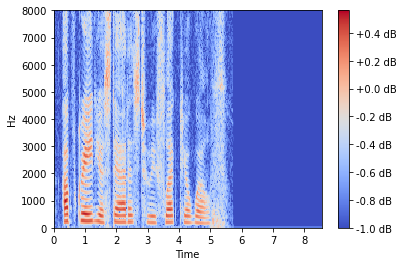

In [26]:
fs,signal = wavfile.read('datasets/thesis/train/speech/timit_train_sr16000_c_1_4s/'+sample+'.wav')
spec2 = compute_logspectrogram2(signal,fs)
librosa.display.specshow(spec2, y_axis='linear', x_axis='time', sr=16000)
spec2.shape
plt.colorbar(format="%+2.1f dB")
plt.savefig('raw_speech.png')

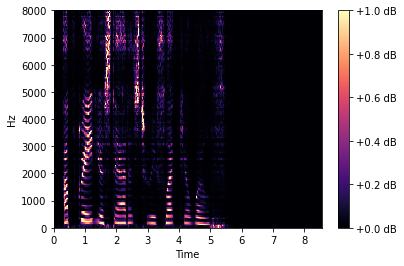

In [25]:
fs,signal = wavfile.read('datasets/thesis/train/speech/timit_train_sr16000_c_1_4s/'+sample+'.wav')
fft = librosa.stft(signal,n_fft=int(0.020*fs),hop_length=int(0.015*fs), win_length=int(0.020*fs))
spec = librosa.util.normalize(fft, axis=1)

librosa.display.specshow(spec, y_axis='linear', x_axis='time', sr=16000)
plt.colorbar(format="%+2.1f dB")

plt.savefig('spec.png')

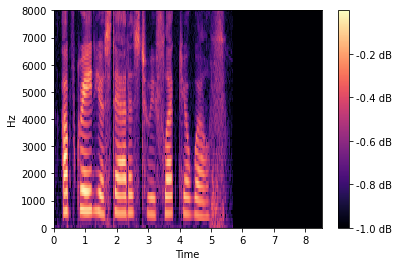

In [35]:
spec = librosa.feature.melspectrogram(signal, sr=fs, 
                                          hop_length=int(0.015*fs), 
                                          n_fft=int(0.020*fs),
                                          n_mels = 100,
                                          center=False)
spec = librosa.power_to_db(spec, ref=np.max)
spec=librosa.util.normalize(spec, axis=1)

librosa.display.specshow(spec, y_axis='linear', x_axis='time', sr=16000)
plt.colorbar(format="%+2.1f dB")

plt.savefig('mel.png')

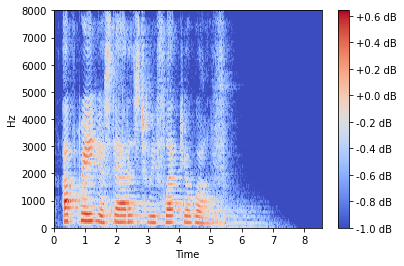

In [23]:
import pickle
with open ('datasets/thesis/train/speech/timit_4s/logspectrogram/0_5UnderpassValencia/'+sample+'.pkl','rb') as f:
    a = pickle.load(f)
f.close()
librosa.display.specshow(a, y_axis='linear', x_axis='time', sr=16000)
a.shape
plt.colorbar(format="%+2.1f dB")
plt.savefig('rev_speech.png')

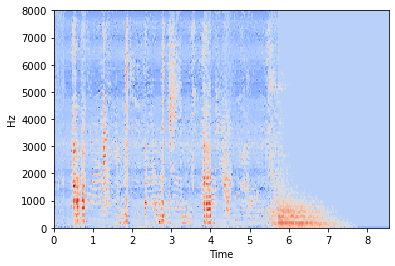

In [15]:
test = a-spec2
librosa.display.specshow(test, y_axis='linear', x_axis='time', sr=16000)


(41, 801)


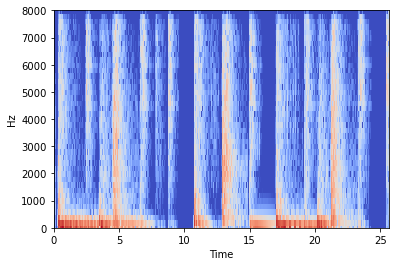

In [79]:
fs,signal = wavfile.read('datasets/thesis/train/music/raw/music-fma-0014.wav')
signal= signal/np.max(np.abs(signal))
signal = signal[:4*fs]
fft = librosa.stft(signal,n_fft=int(0.005*fs),hop_length=int(0.005*fs), win_length=int(0.005*fs))
fft_db = librosa.amplitude_to_db(np.abs(fft))
librosa.display.specshow(fft_db, y_axis='linear', x_axis='time', sr=fs)
print(fft.shape)

(41, 1601)


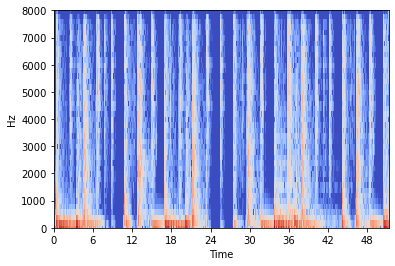

In [78]:
fs,signal = wavfile.read('datasets/thesis/train/music/raw_sr16000_c_1_8s/music-fma-0014.wav')
signal= signal/np.max(np.abs(signal))
fft = librosa.stft(signal,n_fft=int(0.005*fs),hop_length=int(0.005*fs), win_length=int(0.005*fs))
fft_db = librosa.amplitude_to_db(np.abs(fft))
librosa.display.specshow(fft_db, y_axis='linear', x_axis='time', sr=fs)
print(fft.shape)

In [24]:
fs,signal = wavfile.read('datasets/thesis/inference/speech-librivox-0026_resampled_trimmed.wav')
signal= signal/np.max(np.abs(signal))
fft = librosa.stft(signal,n_fft=int(0.020*fs),hop_length=int(0.015*fs), win_length=int(0.020*fs))
fft_db = librosa.amplitude_to_db(np.abs(fft))
librosa.display.specshow(fft_db, y_axis='linear', x_axis='time', sr=fs)
print(fft.shape)

400.0

(41, 801)


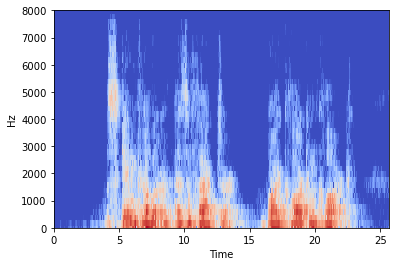

In [41]:
fs2,signal2 = wavfile.read('datasets/thesis/inference/speech-librivox-0026_reverberant.wav')
signal2= signal2/np.max(np.abs(signal2))
fs=16000
fft2 = librosa.stft(signal2,n_fft=int(0.005*fs),hop_length=int(0.005*fs), win_length=int(0.005*fs))
fft_db2 = librosa.amplitude_to_db(np.abs(fft2))
librosa.display.specshow(fft_db2, y_axis='linear', x_axis='time', sr=fs)
print(fft2.shape)

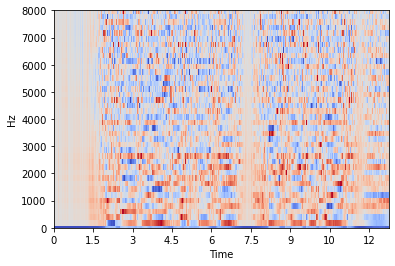

In [13]:
mfcc = compute_norm_mfcc(signal,fs)
librosa.display.specshow(mfcc, y_axis='linear', x_axis='time', sr=fs)

In [31]:
fs,signal = wavfile.read('datasets/thesis/inference/speech-librivox-0026_reverberant.wav')
#fft = librosa.stft(signal)#,n_fft=300)#,hop_length=int(0.010*fs), win_length=int(0.025*fs))
fft = librosa.stft(signal,n_fft=400,hop_length=300, win_length=400)
mfcc = compute_norm_mfcc(signal,fs)
mel = compute_melspectrogram(signal,fs)

In [32]:
int(0.010*fs)

160

In [33]:
int(0.025*fs)

400

In [34]:
fft.shape

(201, 214)

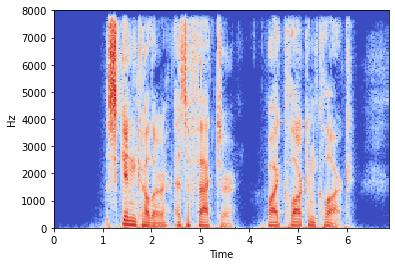

In [38]:
fft_db = librosa.amplitude_to_db(np.abs(fft))

librosa.display.specshow(fft_db, y_axis='linear', x_axis='time', sr=fs)


(1025, 100)

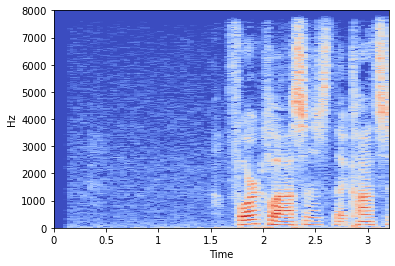

In [16]:
librosa.display.specshow(test[:,:100], y_axis='linear', x_axis='time', sr=fs)
test[:,:100].shape

In [ ]:
with open('datasets/thesis/train/speech/0db/logspectrogram/0_5UnderpassValencia/')

In [76]:
librosa.display.specshow(normed, y_axis='linear', x_axis='time',
                               sr=fs, ax=ax[0])

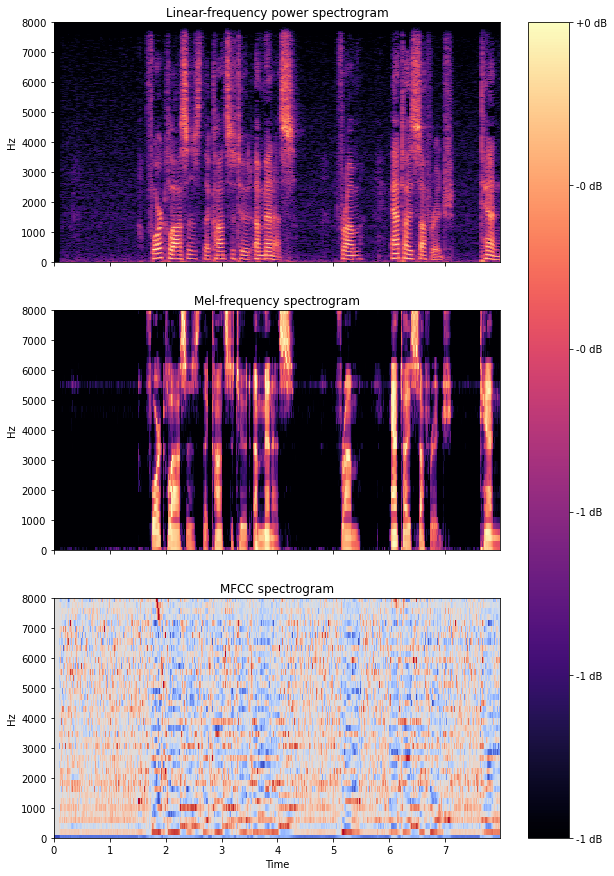

In [74]:
import matplotlib.pyplot as plt
hop_length=int(0.010*fs)

fig, ax = plt.subplots(figsize=(10, 15),nrows=3, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
normed = librosa.util.normalize(D, axis=1)
img = librosa.display.specshow(normed, y_axis='linear', x_axis='time',
                               sr=fs, ax=ax[0])

ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

D2 = librosa.amplitude_to_db(np.abs(mel), ref=np.max)
librosa.display.specshow(D2, y_axis='linear', sr=fs, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Mel-frequency spectrogram')
ax[1].label_outer()

D2 = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)

librosa.display.specshow(mfcc, y_axis='linear', sr=fs, hop_length=hop_length,
                         x_axis='time', ax=ax[2])
ax[2].set(title='MFCC spectrogram')
ax[2].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [3]:
def compute_norm_mfcc_3(signal,sr):
    signal = feature_normalize(signal)
    #mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40, hop_length=256, n_fft=512)
    mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=40, hop_length=int(0.016*sr), n_fft=int(0.04*sr))
    #mfcc = librosa.util.fix_length(mfcc, size = 645, axis=1, mode='wrap') #Reshape to windom size
    mfcc = librosa.util.normalize(mfcc, axis=1)
    return mfcc

def plot_mfcc(mfcc,title,sr,hop_len):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, hop_length= hop_len, 
                             x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title('Log-frequency power spectrogram ' + title)
    plt.tight_layout()
    plt.show()
    

In [15]:
sr, music = wavfile.read('datasets/final_ds/Train/music_sr16000_c_1_15s/music-jamendo-0124.wav')
rev_sr, rev_music = wavfile.read('datasets/audio/musan_music/music-fma-0000.wav')

mfcc = compute_norm_mfcc(music,sr)
rev_mfcc = compute_norm_mfcc_3(rev_music[:240000],rev_sr)

In [16]:
print(f'revsr = {rev_sr} \nmusicsr = {sr}')

revsr = 16000 
musicsr = 16000


In [17]:
print(f'SHAPES\nmfcc = {mfcc.shape} \nrevmfcc = {rev_mfcc.shape}')

SHAPES
mfcc = (40, 1500) 
revmfcc = (40, 938)


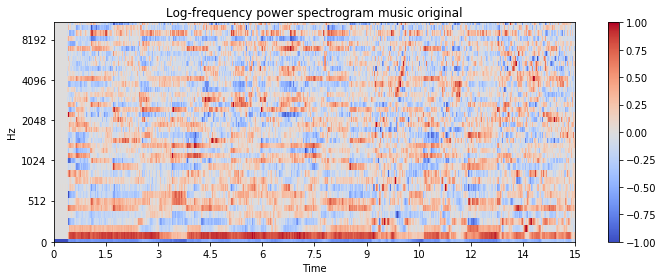

In [18]:
#plot_mfcc(rev_mfcc,'reverberant',rev_sr,256)
plot_mfcc(mfcc,'music original',sr,0.01*sr)

In [19]:
mfcc.shape

(40, 1500)

# From pickle file directly

In [20]:
import pickle

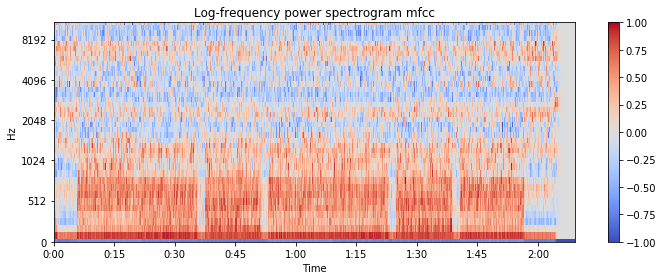

In [40]:
with open('datasets/final_ds/Train/music_mfcc/st-matthews-church-walsall_ir_-_location_1_s1_-_r1/music-fma-0114.pkl','rb') as f:
    mfcc = pickle.load(f)
f.close
plot_mfcc(mfcc,sr=16000,title='mfcc',hop_len=16000*0.01)

In [41]:
mfcc.shape

(40, 12925)

In [15]:
import librosa

In [16]:
fs = 16000
mfcc = librosa.feature.mfcc(sig, sr=fs, n_mfcc=40, hop_length=int(0.010*fs), n_fft=int(0.025*fs))

In [17]:
mfcc.shape

(40, 1501)

In [4]:
0.01*16000

160.0

In [5]:
0.025*16000

400.0

In [7]:
400*16

6400

In [10]:
(16000*15)*0.015

3600.0

In [16]:
15/0.01

1500.0